# Basics Historical

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pytz
import pandas as pd

In [2]:
combined_data = pd.read_csv('BTC-Hourly.csv')
combined_data['date'] = pd.to_datetime(combined_data['date'])
combined_data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,5.205632e+01,2.254677e+06
1,1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,1.068161e+02,4.612210e+06
2,1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,5.275406e+02,2.263535e+07
3,1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,6.975168e+01,2.905822e+06
4,1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,2.471517e+02,1.035935e+07
...,...,...,...,...,...,...,...,...,...
33254,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1.260690e+03
33255,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,1.826200e+02
33256,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,9.177900e+02
33257,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,2.735800e+02


### Current Open

In [3]:
import pandas as pd
import numpy as np

# Assuming 'combined_data' is already correctly loaded and the 'date' column is set as the datetime index
combined_data['date'] = pd.to_datetime(combined_data['date'])
combined_data.set_index('date', inplace=True)

# Extract the first 'open' value of each day
first_values_daily = combined_data.resample('D')['open'].first()

# The following operation was incorrectly attempting to use a lambda function with .map on a datetime index's date component
# A corrected approach is to ensure that we align dates properly for the mapping. 
# However, after setting 'date' as the index, we can't access it directly as 'combined_data['date']'
# Instead, we should use the datetime index to align with 'first_values_daily'

# Since 'combined_data.index' is already a datetime index, we can align it with 'first_values_daily' by ensuring both
# are using the same date for comparison and mapping. Here's how to correctly perform the mapping:
combined_data['current_day_open'] = combined_data.index.normalize().map(first_values_daily)

# Calculate percent change for each record against the current day's opening price
combined_data['percent_change_high'] = (combined_data['high'] - combined_data['current_day_open']) / combined_data['current_day_open'] * 100
combined_data['percent_change_low'] = (combined_data['low'] - combined_data['current_day_open']) / combined_data['current_day_open'] * 100

# Drop rows where 'percent_change' is NaN
combined_data.dropna(subset=['percent_change_high', 'percent_change_low'], inplace=True)


In [4]:
combined_data

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,current_day_open,percent_change_high,percent_change_low
date,,,,,,,,,,,
2022-03-01 00:00:00,1646092800,BTC/USD,43221.71,43626.49,43185.48,43312.27,5.205632e+01,2.254677e+06,43221.71,0.936520,-0.083824
2022-02-28 23:00:00,1646089200,BTC/USD,43085.30,43364.81,42892.37,43178.98,1.068161e+02,4.612210e+06,37717.10,14.973871,13.721283
2022-02-28 22:00:00,1646085600,BTC/USD,41657.23,44256.08,41650.29,42907.32,5.275406e+02,2.263535e+07,37717.10,17.336911,10.428135
2022-02-28 21:00:00,1646082000,BTC/USD,41917.09,41917.09,41542.60,41659.53,6.975168e+01,2.905822e+06,37717.10,11.135506,10.142614
2022-02-28 20:00:00,1646078400,BTC/USD,41361.99,41971.00,41284.11,41914.97,2.471517e+02,1.035935e+07,37717.10,11.278439,9.457275
...,...,...,...,...,...,...,...,...,...,...,...
2018-05-15 10:00:00,1526378400,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1.260690e+03,8733.86,1.501513,-0.443676
2018-05-15 09:00:00,1526374800,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,1.826200e+02,8733.86,0.235177,-0.372229
2018-05-15 08:00:00,1526371200,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,9.177900e+02,8733.86,0.187889,-0.839606


## Descriptive Stats

## Wasserstein

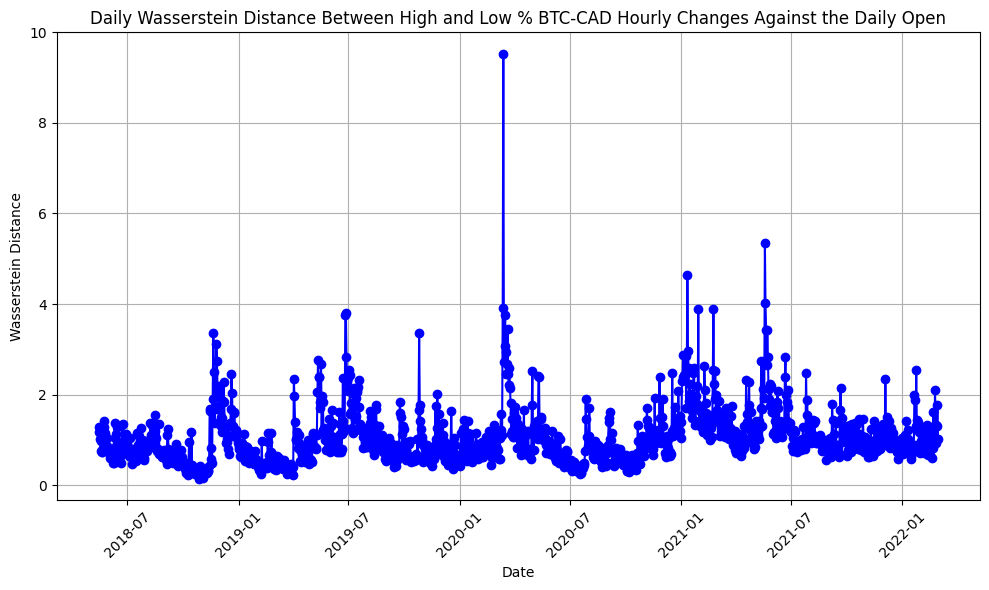

In [5]:
import pandas as pd
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt

# Assuming 'combined_data' is already defined and contains 'percent_change_high' and 'percent_change_low' columns

# First, ensure that 'date' is a datetime column and not just a string
# If 'date' is the index and it's not already in datetime format, convert it
combined_data.index = pd.to_datetime(combined_data.index)

# Normalize the date to ensure it contains only the date part (removing the time part)
# If 'date' is a column:
# combined_data['date'] = combined_data['date'].dt.normalize()

# If 'date' is the index:
combined_data.index = combined_data.index.normalize()

# Group by 'date' and calculate Wasserstein distance for each group
def calculate_wasserstein(group):
    high_changes = group['percent_change_high'].values
    low_changes = group['percent_change_low'].values
    return wasserstein_distance(high_changes, low_changes)

# Apply the function to each group and reset the index to get a DataFrame
wasserstein_distances = combined_data.groupby(combined_data.index).apply(calculate_wasserstein).reset_index(name='Wasserstein_Distance')

# Rename the columns for clarity if needed (this step might be redundant if 'date' is already the index name)
wasserstein_distances.columns = ['Date', 'Wasserstein_Distance']

# Convert 'Date' column to datetime type if it's not already
wasserstein_distances['Date'] = pd.to_datetime(wasserstein_distances['Date'])

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(wasserstein_distances['Date'], wasserstein_distances['Wasserstein_Distance'], marker='o', linestyle='-', color='blue')

plt.title('Daily Wasserstein Distance Between High and Low % BTC-CAD Hourly Changes Against the Daily Open')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Wasserstein Distance')  # Y-axis label
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()


In [6]:
# Find the maximum Wasserstein Distance
max_distance = wasserstein_distances['Wasserstein_Distance'].max()

# Filter the DataFrame to find the row(s) with the maximum Wasserstein Distance
max_distance_row = wasserstein_distances[wasserstein_distances['Wasserstein_Distance'] == max_distance]

# Print the row with the maximum Wasserstein Distance
print(max_distance_row)


          Date  Wasserstein_Distance
668 2020-03-13              9.531138


In [7]:
wasserstein_distances.to_parquet('wass_dist_hist.parquet')

In [8]:
import pandas as pd

# Assuming 'wasserstein_distances' is already loaded

# Ensure the 'Date' column is in datetime format
march_df = wasserstein_distances.iloc[658:678, :]
march_df


,Date,Wasserstein_Distance
658,2020-03-03,0.813663
659,2020-03-04,0.593564
660,2020-03-05,0.783207
661,2020-03-06,0.571237
662,2020-03-07,0.569582
663,2020-03-08,1.032891
664,2020-03-09,1.580296
665,2020-03-10,1.208495
666,2020-03-11,1.116325
667,2020-03-12,3.903514


In [9]:
# Ensure the DataFrame is indexed by 'Date'
wasserstein_distances.set_index('Date', inplace=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_26672\2930328714.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wasserstein_distances['Wasserstein_Distance'] = wasserstein_distances['Wasserstein_Distance'].fillna(method='ffill').fillna(method='bfill')


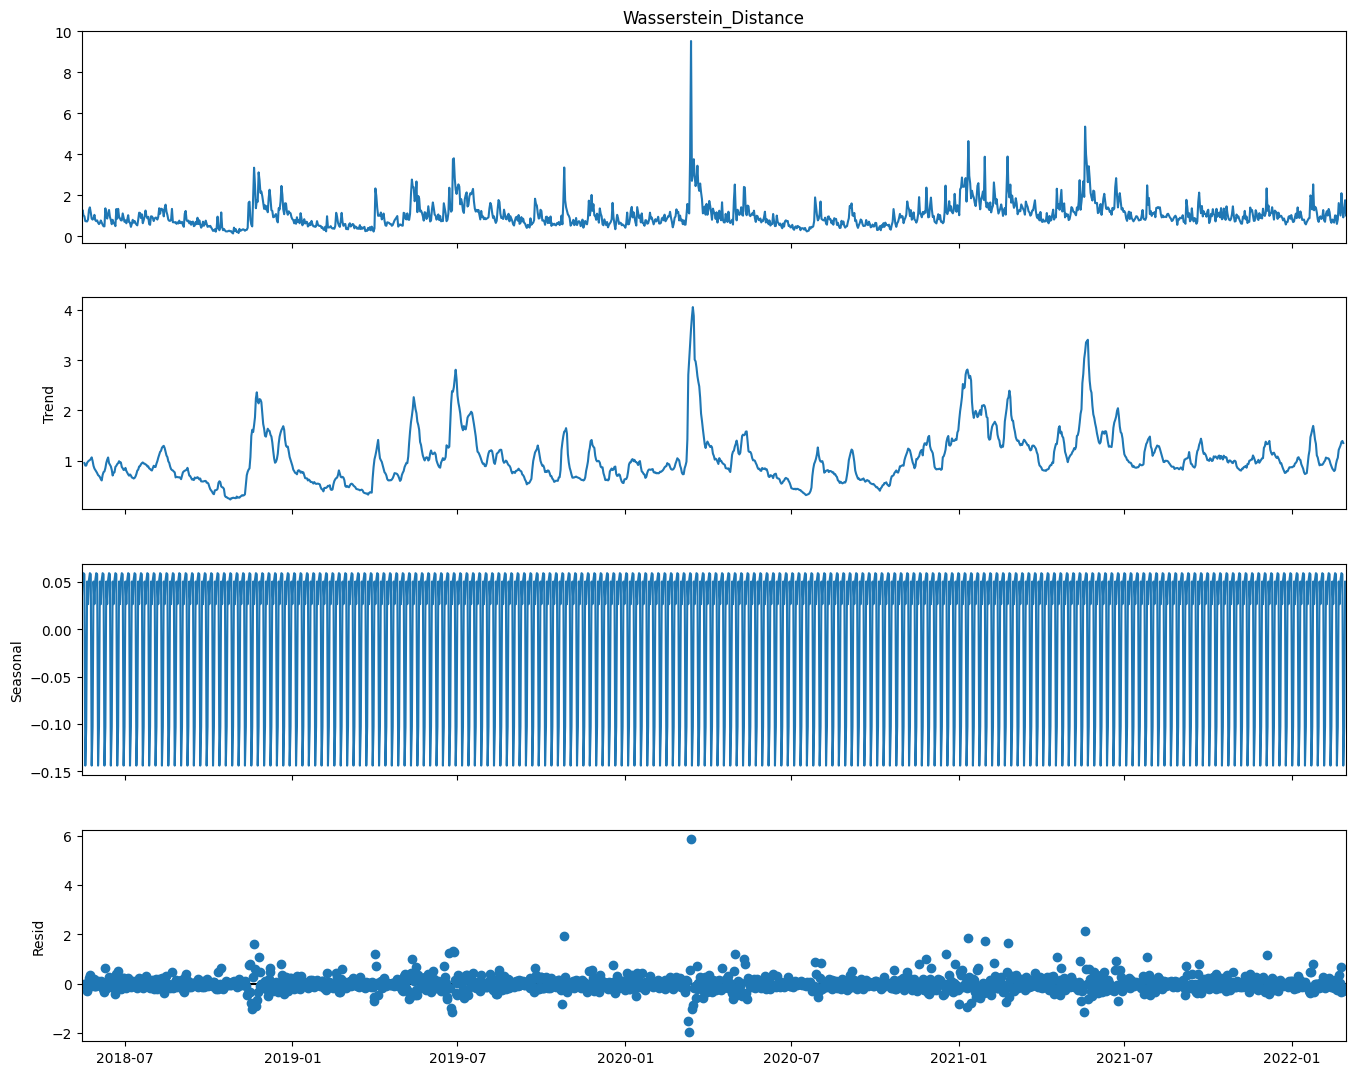

<Figure size 1000x600 with 0 Axes>

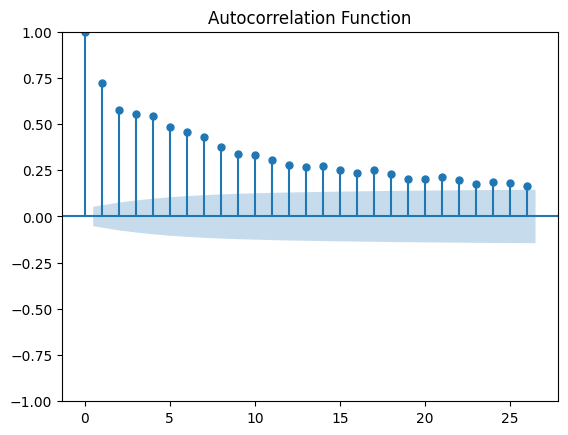

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

wasserstein_distances['Wasserstein_Distance'] = wasserstein_distances['Wasserstein_Distance'].fillna(method='ffill').fillna(method='bfill')
# Seasonal Decompose
result = seasonal_decompose(wasserstein_distances['Wasserstein_Distance'], model='additive', period=7)  # Weekly seasonality

# Plotting the decomposed components of the time series
fig = result.plot()
fig.set_size_inches(15, 12)
plt.show()

# ACF Plot
plt.figure(figsize=(10, 6))
plot_acf(wasserstein_distances['Wasserstein_Distance'], lags=26)  # You can adjust the number of lags based on your dataset
plt.title('Autocorrelation Function')
plt.show()

In [ ]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd

# Fill missing values
wasserstein_distances_filled = wasserstein_distances['Wasserstein_Distance'].fillna(method='ffill').fillna(method='bfill')
print(wasserstein_distances_filled)

# Now, use auto_arima on the filled dataset
from pmdarima import auto_arima

auto_model = auto_arima(wasserstein_distances_filled,
                        seasonal=True,  # Enable seasonal differencing
                        m=7,           # The period for seasonal differencing
                        stepwise=False,  # Stepwise algorithm iterates through combinations of parameters faster
                        trace=True,     # Print status on the fits
                        error_action='ignore',  # Don't want to know if an order does not work
                        suppress_warnings=True,  # Suppress warnings
                        enforce_stationarity=False,
                        enforce_invertibility=False,
                        n_jobs=-1)

# Summary of the best model
print(auto_model.summary())

# Forecast the next N periods with the fitted model
forecast = auto_model.predict(n_periods=1)

# Generating forecast index
forecast_index = pd.date_range(start=wasserstein_distances_filled.index[-1], periods=2, freq='D')[1:]

# Plotting the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(wasserstein_distances_filled.index, wasserstein_distances_filled, label='Original', marker='o', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', marker='o', linestyle='--', color='red')

plt.title('Wasserstein Distance Forecast with Optimized SARIMA')
plt.xlabel('Date')
plt.ylabel('Wasserstein Distance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Windows\AppData\Local\Temp\ipykernel_26672\208196363.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wasserstein_distances_filled = wasserstein_distances['Wasserstein_Distance'].fillna(method='ffill').fillna(method='bfill')


Date
2018-05-15    1.180985
2018-05-16    1.282229
2018-05-17    1.024475
2018-05-18    0.977606
2018-05-19    0.744632
                ...   
2022-02-25    1.318265
2022-02-26    0.925343
2022-02-27    1.308279
2022-02-28    1.762822
2022-03-01    1.020344
Name: Wasserstein_Distance, Length: 1387, dtype: float64


In [ ]:
# Assuming 'forecast' contains the forecasted values from the Holt-Winters model
forecast


## Full Plot - High

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'percent_change_high' is defined as before

# Calculate the median of percent changes
median_percent_change = np.median(combined_data['percent_change_high'])
mean_percent_change = np.mean(combined_data['percent_change_high'])

# 1. Determine Bin Edges
bin_width = 1  # Adjusted bin width to 1 for this example
min_change = combined_data['percent_change_high'].min()
max_change = combined_data['percent_change_high'].max()
bins = np.arange(min_change, max_change + bin_width, bin_width)

# 2. Compute Histogram
counts, bin_edges = np.histogram(combined_data['percent_change_high'], bins=bins)

# 3. Convert Counts to Density
total_counts = counts.sum()
bin_widths = np.diff(bin_edges)
density = counts / (total_counts * bin_widths)

# 4. Store Density Information in a DataFrame
density_df = pd.DataFrame({'Bin Edge Start': bin_edges[:-1], 'Density': density})

# Plotting the density manually
plt.figure(figsize=(10, 6))
plt.bar(density_df['Bin Edge Start'], density_df['Density'], width=bin_width, alpha=0.75)
plt.title('Density of Daily Percentage Changes')
plt.xlabel('Percent Change')
plt.ylabel('Density')
plt.grid(True)

# Add a line for the mean
plt.axvline(mean_percent_change, color='r', linestyle='dashed', linewidth=2)
plt.text(mean_percent_change, plt.ylim()[1] * 0.9, f'Mean: {mean_percent_change:.2f}', color='r')

# Add a line for the median
plt.axvline(median_percent_change, color='g', linestyle='dashed', linewidth=2)
plt.text(median_percent_change, plt.ylim()[1] * 0.8, f'Median: {median_percent_change:.2f}', color='g')

plt.show()


## Full Plot - High

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'percent_change_high' is defined as before

# Calculate the median of percent changes
median_percent_change = np.median(combined_data['percent_change_low'])
mean_percent_change = np.mean(combined_data['percent_change_low'])

# 1. Determine Bin Edges
bin_width = 1  # Adjusted bin width to 1 for this example
min_change = combined_data['percent_change_low'].min()
max_change = combined_data['percent_change_low'].max()
bins = np.arange(min_change, max_change + bin_width, bin_width)

# 2. Compute Histogram
counts, bin_edges = np.histogram(combined_data['percent_change_low'], bins=bins)

# 3. Convert Counts to Density
total_counts = counts.sum()
bin_widths = np.diff(bin_edges)
density = counts / (total_counts * bin_widths)

# 4. Store Density Information in a DataFrame
density_df = pd.DataFrame({'Bin Edge Start': bin_edges[:-1], 'Density': density})

# Plotting the density manually
plt.figure(figsize=(10, 6))
plt.bar(density_df['Bin Edge Start'], density_df['Density'], width=bin_width, alpha=0.75)
plt.title('Density of Daily Percentage Changes')
plt.xlabel('Percent Change')
plt.ylabel('Density')
plt.grid(True)

# Add a line for the mean
plt.axvline(mean_percent_change, color='r', linestyle='dashed', linewidth=2)
plt.text(mean_percent_change, plt.ylim()[1] * 0.9, f'Mean: {mean_percent_change:.2f}', color='r')

# Add a line for the median
plt.axvline(median_percent_change, color='g', linestyle='dashed', linewidth=2)
plt.text(median_percent_change, plt.ylim()[1] * 0.8, f'Median: {median_percent_change:.2f}', color='g')

plt.show()
